In [2]:
!pip install imutils

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical  # Replace np_utils with to_categorical
from tensorflow.keras.models import Sequential     # Use tensorflow.keras instead of keras
from tensorflow.keras import optimizers  
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [4]:
# import random
# from sklearn.model_selection import train_test_split

# # Load all data
# data = []
# img_size = 32
# non_chars = ["#", "$", "&", "@"]

# # Load both training and validation datasets into one
# for dir_path in ["handwritten-characters/Train/", "handwritten-characters/Validation/"]:
#     for i in os.listdir(dir_path):
#         if i in non_chars:
#             continue
#         sub_directory = os.path.join(dir_path, i)
#         for j in os.listdir(sub_directory):
#             img = cv2.imread(os.path.join(sub_directory, j), 0)
#             img = cv2.resize(img, (img_size, img_size))
#             data.append([img, i])

# # Shuffle the dataset to ensure random distribution
# random.shuffle(data)

# # Split features (images) and labels
# images = np.array([item[0] for item in data]).reshape(-1, img_size, img_size, 1)
# labels = np.array([item[1] for item in data])

# # Convert labels to one-hot encoding
# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)

# # Split data into 80% training and 20% testing
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# # Print the shape to verify
# print(f"Training Data Shape: {X_train.shape}, Training Labels Shape: {y_train.shape}")
# print(f"Testing Data Shape: {X_test.shape}, Testing Labels Shape: {y_test.shape}")


In [5]:
dir = "handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [6]:
len(train_data)

140000

In [7]:
val_dir = "handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [8]:
len(val_data)

15209

In [9]:
random.shuffle(train_data)
random.shuffle(val_data)

In [10]:
X_train = []
y_train = []
for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [11]:
X_val = []
Y_val = []
for features,label in val_data:
    X_val.append(features)
    Y_val.append(label)

In [12]:
LB = LabelBinarizer()
y_train = LB.fit_transform(y_train)
Y_val = LB.fit_transform(Y_val)

In [13]:
X_train = np.array(X_train)/255.0
X_train = X_train.reshape(-1,32,32,1)
y_train = np.array(y_train)

In [14]:
X_val = np.array(X_val)/255.0
X_val = X_val.reshape(-1,32,32,1)
Y_val = np.array(Y_val)

In [15]:
print(X_train.shape,X_val.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [16]:
print(y_train.shape,Y_val.shape)

(140000, 35) (15209, 35)


In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

c:\Users\KAAMRAN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         4,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,851 (636.14 KB)

 Trainable params: 162,851 (636.14 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# datagen = ImageDataGenerator(rotation_range=180, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
# datagen.fit(X_train)


In [20]:
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, Y_val), epochs=20)

Epoch 1/20
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 66s 14ms/step - accuracy: 0.7128 - loss: 0.9420 - val_accuracy: 0.8510 - val_loss: 0.6687
Epoch 2/20
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 62s 14ms/step - accuracy: 0.8905 - loss: 0.3088 - val_accuracy: 0.8678 - val_loss: 0.6741
Epoch 3/20
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 59s 13ms/step - accuracy: 0.9051 - loss: 0.2642 - val_accuracy: 0.8715 - val_loss: 0.6195
Epoch 4/20
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 60s 14ms/step - accuracy: 0.9128 - loss: 0.2348 - val_accuracy: 0.8663 - val_loss: 0.6424
Epoch 5/20
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 61s 14ms/step - accuracy: 0.9177 - loss: 0.2209 - val_accuracy: 0.8660 - val_loss: 0.6936
Epoch 6/20
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 59s 14ms/step - accuracy: 0.9196 - loss: 0.2126 - val_accuracy: 0.8826 - val_loss: 0.6717
Epoch 7/20
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 59s 13ms/step - accuracy: 0.9234 - loss: 0.2023 - val_accuracy: 0.8649 - val_loss: 0.7163
Epoch 8/20
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 58s 13ms/step - accuracy: 0.9257 -

In [21]:
loss, accuracy = model.evaluate(X_val ,Y_val)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8792 - loss: 0.7882
Validation Loss: 0.7873531579971313, Validation Accuracy: 0.8765862584114075


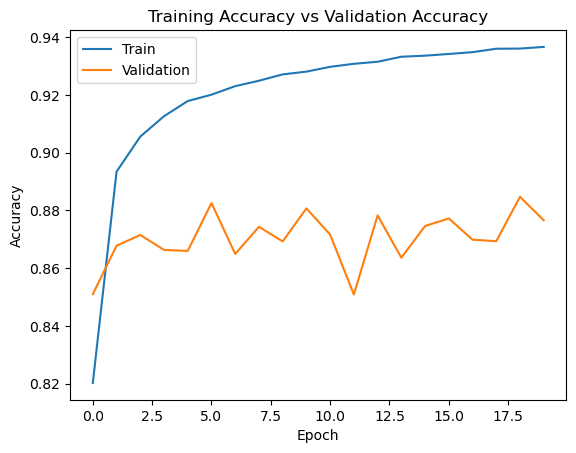

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

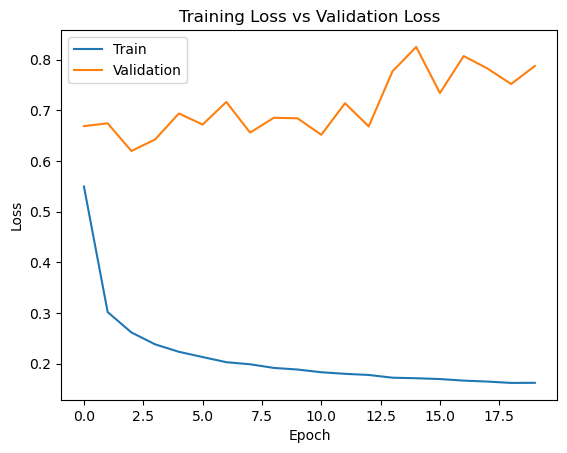

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [25]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

plt.imshow(image)

NameError: name 'image' is not defined

In [260]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MCDAPHVE


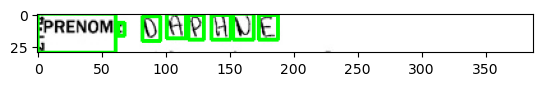

In [261]:
letter,image = get_letters("train_v2/train/TRAIN_00005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
7AFFEIX


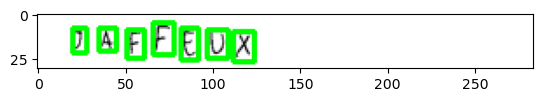

In [262]:
letter,image = get_letters("train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MWMNWEWHM


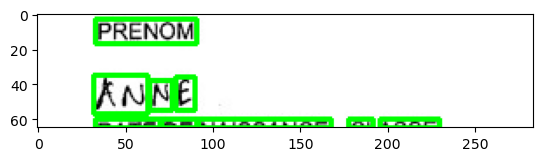

In [263]:
letter,image = get_letters("train_v2/train/TRAIN_00031.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [264]:

with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved to 'trained_model.pkl' ")


Model saved to 'trained_model.pkl' 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
FBCD


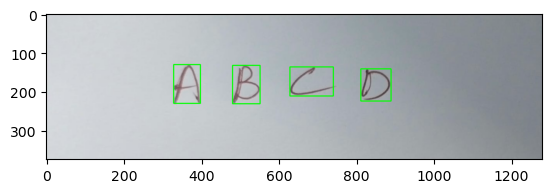

In [265]:
letter,image = get_letters("abcd.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

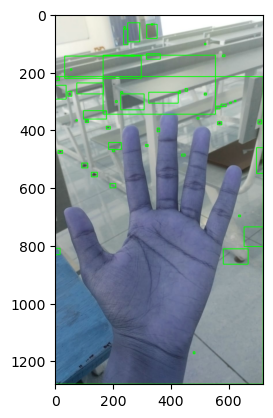

In [269]:
letter,image = get_letters("hand.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [267]:

with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved to 'trained_model.pkl' ")


Model saved to 'trained_model.pkl' 
